# Zadanie V

In [ ]:
conda install matplotlib

In [ ]:
conda install scikit-learn

### Importowanie

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
from sklearn import datasets

In [11]:
from sklearn import model_selection

In [14]:
from sklearn import tree

### Zadanie

In [8]:
wine = datasets.load_wine()

In [9]:
print('Ilość zmiennych: ', wine.data.shape[1])
print('Nazwy zmiennych: ', wine.feature_names)
print('Etykiety klas: ', wine.target_names)
print('Wartości wyjściowe: ', np.unique(wine.target))
print('Ilość klas: ', len(np.unique(wine.target)))
print('Ilość przypadków: ', wine.data.shape[0])

Ilość zmiennych:  13
Nazwy zmiennych:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Etykiety klas:  ['class_0' 'class_1' 'class_2']
Wartości wyjściowe:  [0 1 2]
Ilość klas:  3
Ilość przypadków:  178


In [10]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [55]:
data_target = wine.target

In [54]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(wine.data, data_target, test_size=0.3\
                                                                    , random_state=13)

## Drzewo decyzyjne

In [17]:
clf = tree.DecisionTreeClassifier()

In [56]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
def accuracy_score(target, predicted):
    return np.mean(target == predicted)

In [66]:
predicted_test = clf.predict(x_test)
predicted_train = clf.predict(x_train)

print('Test accuracy: %.2f' % (accuracy_score(y_test, predicted_test)))
print('Train accuracy: %.2f' % (accuracy_score(y_train, predicted_train)))

Test accuracy: 0.87
Train accuracy: 1.00


In [65]:
print('Depth: ', clf.tree_.max_depth)
#print(tree.export_text(clf, feature_names=wine.feature_names))

Depth:  6


In [235]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

predicted_test = clf.predict(x_test)
predicted_train = clf.predict(x_train)

print('Test accuracy: %.2f' % (accuracy_score(y_test, predicted_test)))
print('Train accuracy: %.2f' % (accuracy_score(y_train, predicted_train)))

Test accuracy: 0.96
Train accuracy: 0.98


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcea19a95d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcea19b4090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcea199bf90>,
 'medians': [<matplotlib.lines.Line2D at 0x7fcea19b4b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcea19bd090>,
 'means': []}

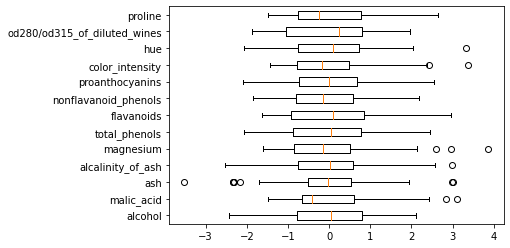

In [92]:
dt_mean = np.mean(x_train, axis=0)
dt_std = np.std(x_train, axis=0)

x_train_std = (x_train - dt_mean)/dt_std

plt.boxplot(x_train_std, vert=False, labels=wine.feature_names)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcea1867210>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcea1857c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcea18674d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fcea1875350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcea1875410>,
 'means': []}

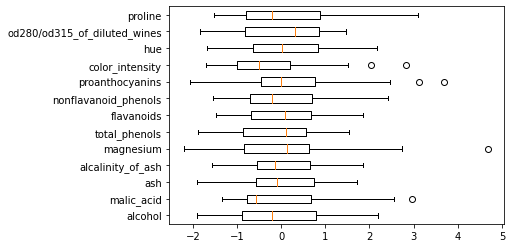

In [93]:
x_test_std = (x_test - dt_mean)/dt_std
plt.boxplot(x_test_std, vert=False, labels=wine.feature_names)

## kNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
clf2 = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

In [99]:
clf2 = clf2.fit(x_train_std, y_train)

In [107]:
prediction = clf2.predict(x_test_std)

print('Test accuracy: %.2f' % (accuracy_score(prediction, y_test)))

Test accuracy: 0.98


In [139]:
clf2 = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
clf2 = clf2.fit(x_train_std, y_train)

prediction_test = clf2.predict(x_test_std)
prediction_train = clf2.predict(x_train_std)

print('Test accuracy: %.2f' % (accuracy_score(prediction_test, y_test)))
print('Train accuracy: %.2f' % (accuracy_score(prediction_train, y_train)))

Test accuracy: 1.00
Train accuracy: 1.00


## Regresja logistyczna

In [140]:
from sklearn.linear_model import LogisticRegression

In [142]:
clf3 = LogisticRegression()

In [143]:
clf3 = clf3.fit(x_train_std, y_train)

In [150]:
prediction_lr = clf3.predict(x_test_std)

print('Test accuracy: %.2f' % (accuracy_score(prediction_lr, y_test)))

Test accuracy: 1.00


In [172]:
clf3 = LogisticRegression(C=0.5, solver='lbfgs', multi_class='ovr')
clf3.fit(x_train_std, y_train)

prediction_lr_train = clf3.predict(x_train_std)
prediction_lr_test = clf3.predict(x_test_std)

print('Test accuracy: %.2f' % (accuracy_score(prediction_lr_test, y_test)))
print('Train accuracy: %.2f' % (accuracy_score(prediction_lr_train, y_train)))

Test accuracy: 1.00
Train accuracy: 1.00


## SVM

In [173]:
from sklearn.svm import SVC

In [174]:
clf4 = SVC(kernel='linear')

In [175]:
clf4 = clf4.fit(x_train_std, y_train)
prediction_svm = clf4.predict(x_test_std)

print('Test accuracy: %.2f' % (accuracy_score(prediction_svm, y_test)))

Test accuracy: 0.96


In [201]:
clf4 = SVC(C=0.05, kernel='linear')
clf4.fit(x_train_std, y_train)

prediction_svm_train = clf4.predict(x_train_std)
prediction_svm_test = clf4.predict(x_test_std)

print('Test accuracy: %.2f' % (accuracy_score(prediction_svm_test, y_test)))
print('Train accuracy: %.2f' % (accuracy_score(prediction_svm_train, y_train)))

Test accuracy: 1.00
Train accuracy: 0.99


# Wyniki

### Drzewo decyzyjne

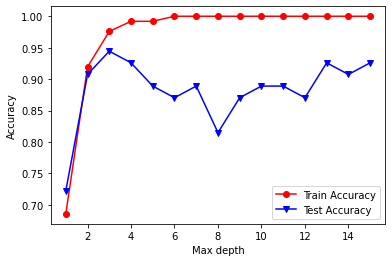

In [238]:
depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

testAccuracy = []
trainAccuracy = []

for depth in depths:
    clf_results1 = tree.DecisionTreeClassifier(max_depth=depth)
    clf_results1.fit(x_train, y_train)
    pred_test_1 = clf_results1.predict(x_test)
    pred_train_1 = clf_results1.predict(x_train)
    testAccuracy.append(accuracy_score(y_test, pred_test_1))
    trainAccuracy.append(accuracy_score(y_train, pred_train_1))
    
plt.plot(depths, trainAccuracy, 'ro-', depths, testAccuracy, 'bv-')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

### kNN

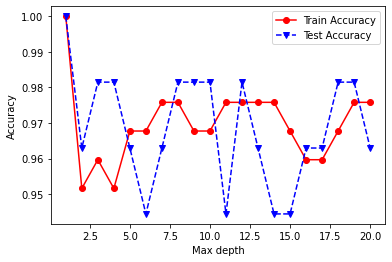

In [236]:
neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

testAccuracy2 = []
trainAccuracy2 = []

for neighbor in neighbors:
    clf_results2 = KNeighborsClassifier(n_neighbors=neighbor, metric='minkowski', p=2)
    clf_results2.fit(x_train_std, y_train)
    pred_test_2 = clf_results2.predict(x_test_std)
    pred_train_2 = clf_results2.predict(x_train_std)
    testAccuracy2.append(accuracy_score(y_test, pred_test_2))
    trainAccuracy2.append(accuracy_score(y_train, pred_train_2))
    
plt.plot(neighbors, trainAccuracy2, 'ro-', neighbors, testAccuracy2, 'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.show()

### Regresja logistyczna

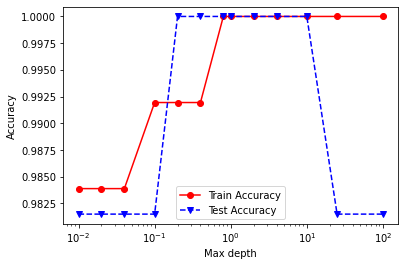

In [247]:
parameters = [0.01,0.02,0.04,0.1,0.2,0.4,0.8,1,2,4,10,25,100]

testAccuracy3 = []
trainAccuracy3 = []

for parameter in parameters:
    clf_results3 = LogisticRegression(C=parameter, solver='lbfgs', multi_class='ovr')
    clf_results3.fit(x_train_std, y_train)
    pred_test_3 = clf_results3.predict(x_test_std)
    pred_train_3 = clf_results3.predict(x_train_std)
    testAccuracy3.append(accuracy_score(y_test, pred_test_3))
    trainAccuracy3.append(accuracy_score(y_train, pred_train_3))
    
plt.plot(parameters, trainAccuracy3, 'ro-', parameters, testAccuracy3, 'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()

### SVM

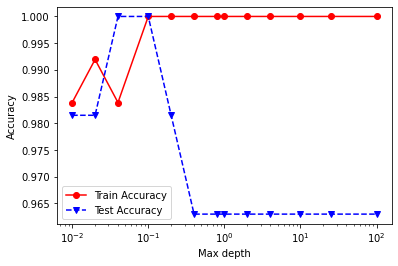

In [244]:
parameters = [0.01,0.02,0.04,0.1,0.2,0.4,0.8,1,2,4,10,25,100]

testAccuracy4 = []
trainAccuracy4 = []

for parameter in parameters:
    clf_results4 = SVC(C=parameter, kernel='linear')
    clf_results4.fit(x_train_std, y_train)
    pred_test_4 = clf_results4.predict(x_test_std)
    pred_train_4 = clf_results4.predict(x_train_std)
    testAccuracy4.append(accuracy_score(y_test, pred_test_4))
    trainAccuracy4.append(accuracy_score(y_train, pred_train_4))
    
plt.plot(parameters, trainAccuracy4, 'ro-', parameters, testAccuracy4, 'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()

# Najlepsze wyniki:


Drzewo decyzyjne:
Max Depths: <strong>3</strong>, 4, 13, 15

kNN:
Neighbors: <strong>1</strong>, 3, 4, 8, 10, 12, 18, 19

Regresja logistyczna:
C: [0.2 - 10]

SVM:
C: <strong>0.04, 0.1</strong>
